In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [25]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [26]:
X_train /= 255
X_test /= 255

In [27]:
class PCA:
    def __init__(self, n_components: int):
        # Ana bilesen sayisi
        self.n_components = n_components
        self.eigen_vals = None
        self.eigen_vecs = None

    def fit(self, data: np.ndarray):
        # Kovaryans matrisi hesaplanir.
        cov_mat = np.cov(data, rowvar=False)

        # Ozdegerler (eigen values) ve ozvektorler (eigen vectors) hesaplanir.
        eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

        # Ozdegerler (eigen values) buyukten kucuge siralanir.
        idx = eigen_vals.argsort()[::-1]
        self.eigen_vals = eigen_vals[idx]
        self.eigen_vecs = eigen_vecs[:, idx]

    def transform(self, data: np.ndarray) -> np.ndarray:
        # Secilen ozbilesenlerle veri donusturulur.
        principal_components = data @ self.eigen_vecs[:, :self.n_components]
        return principal_components

    def fit_transform(self, data: np.ndarray) -> np.ndarray:
        self.fit(data)
        return self.transform(data)

In [28]:
pca = PCA(n_components=3)
pca.fit(X_train)

In [29]:
X_pca = pca.transform(X_train)

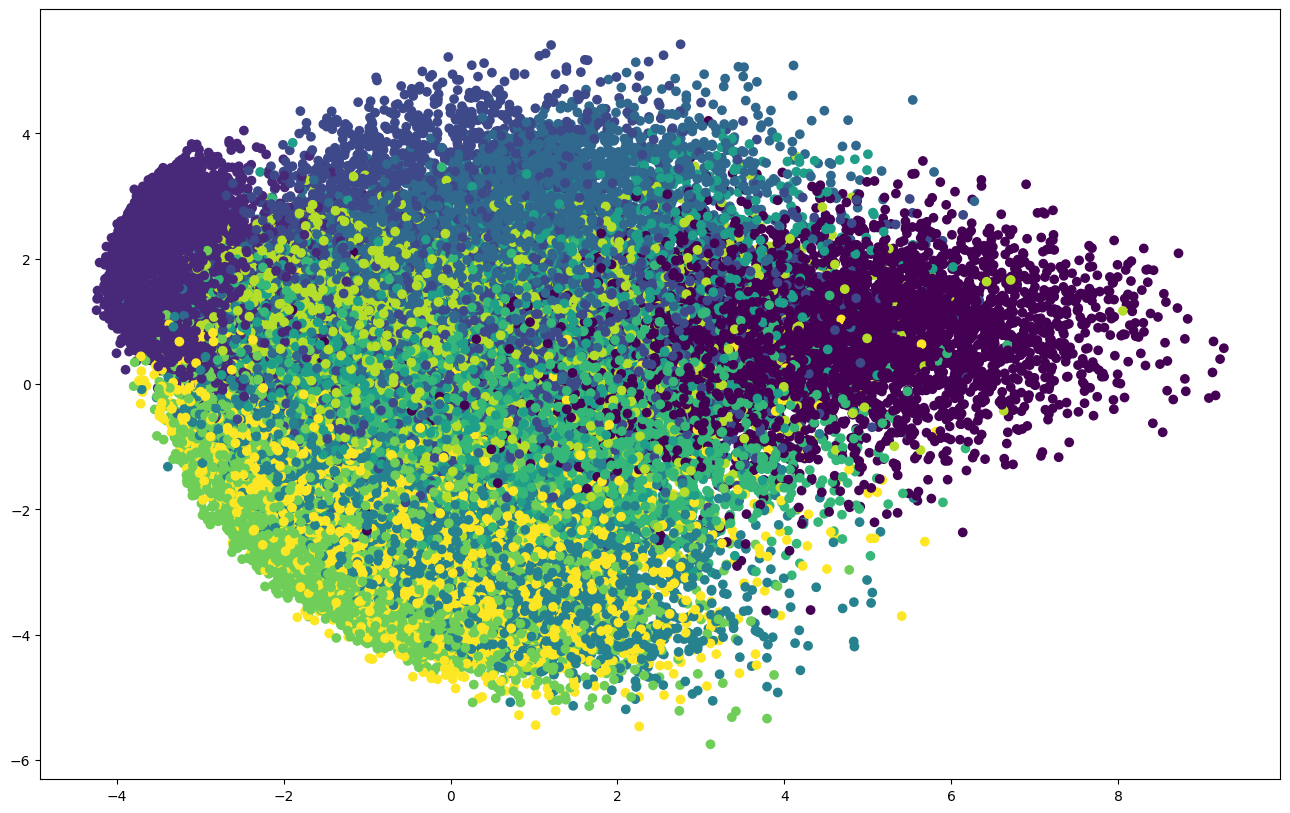

In [30]:
plt.figure(figsize=(16, 10))
plt.scatter(transformed_x[:, 0], transformed_x[:, 1], c=y_train)
plt.show()